In [13]:
import librenderman as rm
import numpy as np
import IPython.display as ipd

In [2]:
waveshell_path = '/Applications/Waves/WaveShells V11/WaveShell6-VST3 11.0.vst3'

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

In [14]:
# It was a bit too much to wrap the Juce PluginDescription object entirely so I used the
# built-in XML serialization facility to output everything
print(engine.get_available_plugins_xml(waveshell_path))

<?xml version="1.0" encoding="UTF-8"?>

<KNOWNPLUGINS>
  <PLUGIN name="NS1 Stereo" format="VST3" category="Fx|Restoration" manufacturer="Waves"
          version="11.0.61" file="/Applications/Waves/WaveShells V11/WaveShell6-VST3 11.0.vst3"
          uid="240ae8bf" isInstrument="0" fileTime="173bed52ae0" infoUpdateTime="174b7652f64"
          numInputs="2" numOutputs="2" isShell="0"/>
  <PLUGIN name="NS1 Mono" format="VST3" category="Fx|Restoration" manufacturer="Waves"
          version="11.0.61" file="/Applications/Waves/WaveShells V11/WaveShell6-VST3 11.0.vst3"
          uid="69fb902b" isInstrument="0" fileTime="173bed52ae0" infoUpdateTime="174b7652f46"
          numInputs="1" numOutputs="1" isShell="0"/>
</KNOWNPLUGINS>



In [15]:
# Get a plugin name -> plugin index mapping for shell plugins
plugin_names = engine.get_available_plugin_names(waveshell_path)
plugin_names

{'NS1 Stereo': 0, 'NS1 Mono': 1}

In [22]:
import librosa
data, sr = librosa.load(
    'noisy_sample.wav',
    sr=sampleRate, res_type='kaiser_fast'
)
data.shape, sr

((217374,), 44100)

In [7]:
# Ask Waveshell to load NS1 Mono
engine.load_plugin(waveshell_path, plugin_names['NS1 Mono'])

True

In [8]:
engine.get_plugin_parameters_description()

[(0, 'Bypass'), (1, 'Bank'), (2, 'NS1')]

In [26]:
engine.get_plugin_parameter_size()

3

In [27]:
generator = rm.PatchGenerator(engine)

In [23]:
# list of (parameter index, parameter value) pairs
patch = [(0,0), (1, 0), (2, 0.8)]
engine.set_patch(patch)

data_normed = data*(2**(-0.5))/np.max(np.abs(data))
# plugin expects type float in python (=double in C)
engine.render_wav(data_normed.astype(float))
audio = engine.get_audio_frames()

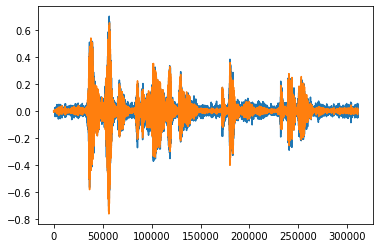

In [20]:
import matplotlib.pyplot as plt
plt.plot(data_normed)
plt.plot(audio)


In [21]:
ipd.display(ipd.Markdown("#### Input audio"))
ipd.display(ipd.Audio(data_normed, rate=sampleRate))
ipd.display(ipd.Markdown("#### Processed audio"))
ipd.display(ipd.Audio(audio, rate=sampleRate))

#### Input audio

#### Processed audio